Epoch 0, Loss: 11257835.0


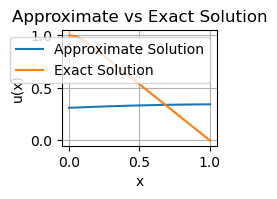

Epoch 1000, Loss: 279.8612060546875


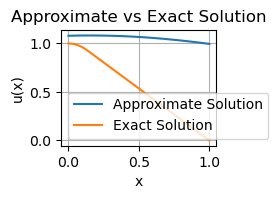

Epoch 2000, Loss: 251.48956298828125


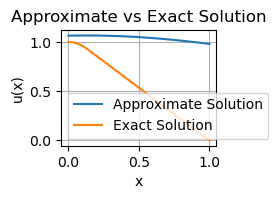

Epoch 3000, Loss: 206.3751220703125


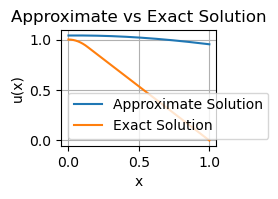

Epoch 4000, Loss: 135.9650421142578


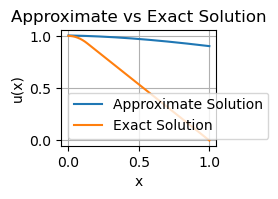

Epoch 5000, Loss: 25.263029098510742


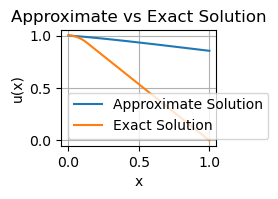

Epoch 6000, Loss: 4.55125617980957


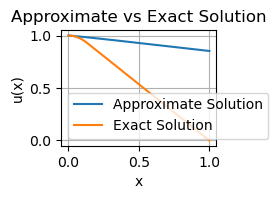

Epoch 7000, Loss: 1.9267367124557495


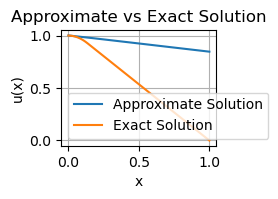

Epoch 8000, Loss: 1.340408444404602


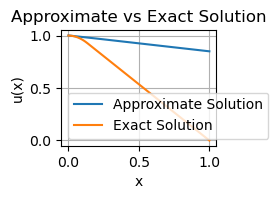

Epoch 9000, Loss: 1.2857614755630493


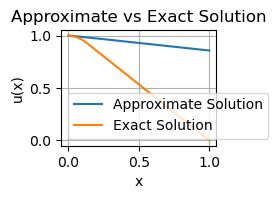

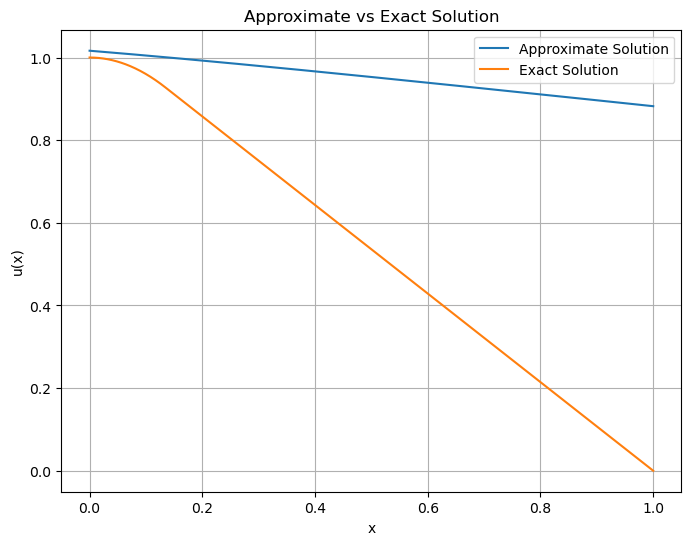

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.optim as optim
import torch.nn as nn

class PINN(nn.Module):
    def __init__(self):
        super(PINN, self).__init__()
        self.layer1 = nn.Linear(1, 20)
        self.layer2 = nn.Linear(20, 20)
        self.layer3 = nn.Linear(20, 20)
        self.layer4 = nn.Linear(20, 1)

    def forward(self, x):
        x = torch.tanh(self.layer1(x))
        x = torch.tanh(self.layer2(x))
        x = torch.tanh(self.layer3(x))
        x = self.layer4(x)
        return x

def exact_solution(x):
    a=1-(3**0.5)/2
    out = np.zeros_like(x)
    for i in range(len(x)):
        if x[i]>=-a and x[i]<=a:
            out[i] = 1-4*(x[i]**2)
        elif (x[i]>=a and x[i]<=1): 
            out[i] = (1-4*(a**2))*(x[i]-1)/(a-1)
        elif (x[i]>=-1 and x[i]<=-a): 
            out[i] 
    return out

            
def loss_function(u_pred, x_pred, g_pred, model):
    u_prime = torch.autograd.grad(u_pred, x_pred, grad_outputs=torch.ones_like(u_pred), create_graph=True, retain_graph=True)[0]
    u_doubleprime = torch.autograd.grad(u_prime, x_pred, grad_outputs=torch.ones_like(u_prime), create_graph=True, retain_graph=True)[0]
    
    energy = 0.5 * torch.sum(u_prime * u_prime) - torch.sum(g_pred * u_pred)
    
    penalty_1 = torch.sum((torch.square(torch.max(torch.zeros_like(u_pred), g_pred - u_pred))))
    penalty_2 = torch.sum(torch.square(torch.max(torch.zeros_like(u_pred), u_doubleprime)))

    
    constraint_loss = torch.sum(((u_pred - g_pred) * (-u_doubleprime)))

    total_loss = (10**5) * penalty_1 + (10**5) * penalty_2 + constraint_loss # energy +

    return total_loss


def main():
    x = torch.linspace(0, 1, 1000).reshape(-1, 1)
    x.requires_grad_(True)

    g = 1 - 4 * (x ** 2) 

    model = PINN()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    for epoch in range(10000):
        optimizer.zero_grad()
        u_pred = model(x)
        loss = loss_function(u_pred, x, g, model)
        loss.backward(retain_graph=True)
        optimizer.step()

        if epoch % 1000 == 0:
            print(f"Epoch {epoch}, Loss: {loss.item()}")
            u_approx = model(x)

            x_np = x.detach().numpy()
            u_approx_np = u_approx.detach().numpy()
            u_exact_np = exact_solution(x_np)

            plt.figure(figsize=(2, 1.5))
            plt.plot(x_np, u_approx_np, label='Approximate Solution')
            plt.plot(x_np, u_exact_np, label='Exact Solution')
            plt.xlabel('x')
            plt.ylabel('u(x)')
            plt.title('Approximate vs Exact Solution')
            plt.legend()
            plt.grid(True)
            plt.show()

    u_approx = model(x)

    x_np = x.detach().numpy()
    u_approx_np = u_approx.detach().numpy()
    u_exact_np = exact_solution(x_np)

    plt.figure(figsize=(8, 6))
    plt.plot(x_np, u_approx_np, label='Approximate Solution')
    plt.plot(x_np, u_exact_np, label='Exact Solution')
    plt.xlabel('x')
    plt.ylabel('u(x)')
    plt.title('Approximate vs Exact Solution')
    plt.legend()
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    main()


In [5]:
x_np.shape

(1000, 1)